# **Project Explanation**

<hr>

1. **What is census?**

**A census is the process of gathering, compiling, and distributing demographic, economic, and social data relevant to all citizens of a nation or geographically defined area of a country at a given period. Some countries often include a housing census in a census count. It is a method for gathering, compiling, and distributing data about buildings, houses, and amenities like sewage systems, restrooms, electricity, etc.**

<hr>

2. **What is Census Income?**

**Adult Census Income Prediction is the task of predicting an individual's income level based on their demographic and socioeconomic characteristics. This is typically done using machine learning algorithms trained on large census income data sets. It involves developing ML models that can accurately predict an individual's income level, which can be useful for various applications such as targeted marketing, credit risk assessment, and public policy analysis.**

<hr>

3. **Information?**

**The census income dataset is highly significant as it provides valuable information on economic trends and income distribution. Several businesses, government agencies, and non-profit organizations use this data to assess risk and develop targeted marketing strategies. The census income dataset is valuable for analyzing income inequality and developing policies for boosting economic growth and minimizing poverty.**



<hr>

# **Census Income Dataset Understanding**

**A good grasp of the dataset's structure, variables, and meanings provides a solid foundation for analysis and modeling in any data science project.**

**Dataset Explanation:**

1. **Age: Age of the individual.**

2. **Workclass: The type of work the individual is engaged in (e.g., private, self-employed, government).**

3. **Final Weight: A weight assigned to each observation for survey analysis purposes.**

4. **Education: The highest level of education completed by the individual.**

5. **Education Number of Years: The number of years of education completed.**

6. **Marital-status: The marital status of the individual.**

7. **Occupation: The occupation of the individual.**

8. **Relationship: The relationship of the individual to the household.**

9. **Race: The race of the individual.**

10. **Sex: The gender of the individual.**

11. **Capital-gain: Capital gains earned by the individual.**

12. **Capital-loss: Capital losses incurred by the individual.**

13. **Hours-per-week: The number of hours worked per week.**

14. **Native-country: The country of origin of the individual.**

<hr>

# **Step 1 - Importing Libraries**

**Configuration Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

**Classical Data Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [3]:
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

<hr>

# **Step 2 - Data Loading and Inspection Phase**

**Data Loading**

In [4]:
df = pd.read_csv("census-income .csv")

**Data Inspection**

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Insights**
  * **The data is mostly categorical, that means if we are going ahead with predictive analysis we need to do encoding**

  * **5 of the columns are continuous in nature**

  * **`annual_income` is the target column**




<hr>

**Shape Inspection**

In [6]:
a = df.shape
print(f"Rows: {a[0]} & Columns: {a[1]}")

Rows: 32561 & Columns: 15


<hr>

**Brief on the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**No null values were found in this data**

<hr>

**Statistical Information on the data**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**Insights**
  * **On an average a person's age is 38, with minimum age as 17 and maximum age as 90, it was a right skewed distribution**

  * **On an average a person is working 40 hours a week, that mean 8hrs a day. Moreover, the maximum a person is working is 99hrs a week**

<Axes: xlabel='age', ylabel='Density'>

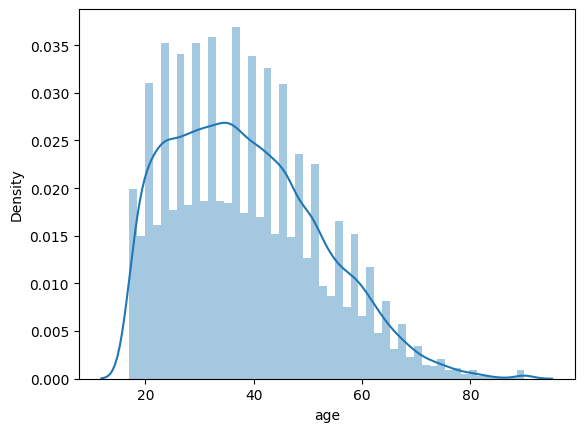

In [9]:
sns.distplot(df["age"])

<hr>

**Statistical summary on the object data**

In [10]:
df.describe(include = "O").T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
annual_income,32561,2,<=50K,24720


**Using this data, can we do the imputation of missing object values**

<hr>

# **Step 3 - Data Preprocessing**

* **Check for nulls, duplicates, outliers**
* **Dropping irrelevant Columns**
* **Label Encoding**

**Check for null values**

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

**As seen above in the information, there is no null values**

<hr>

**Check for the duplicates**

In [12]:
df.duplicated().sum()

np.int64(24)

In [13]:
df = df.drop_duplicates()

<hr>

**Outlier Detection**

**How do we identify the outliers in the data?**

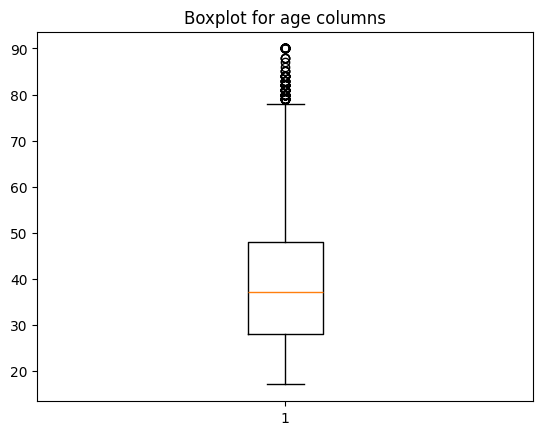

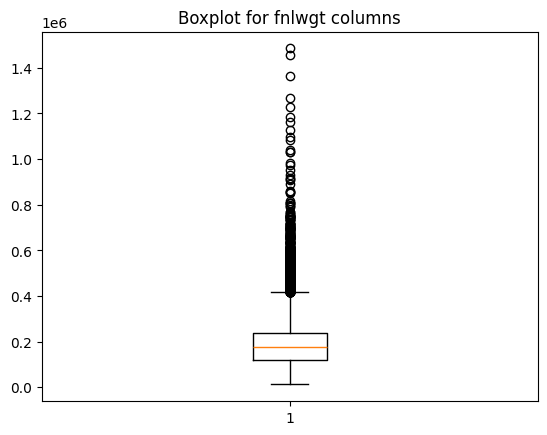

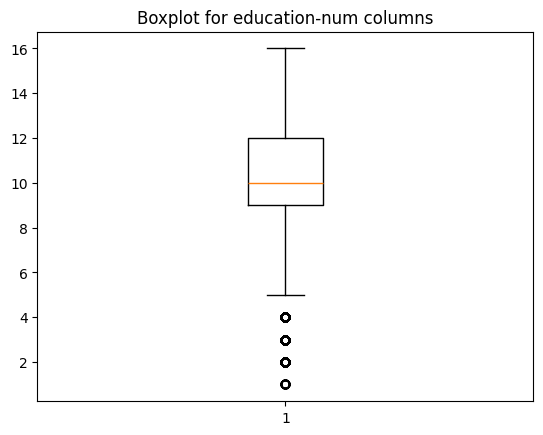

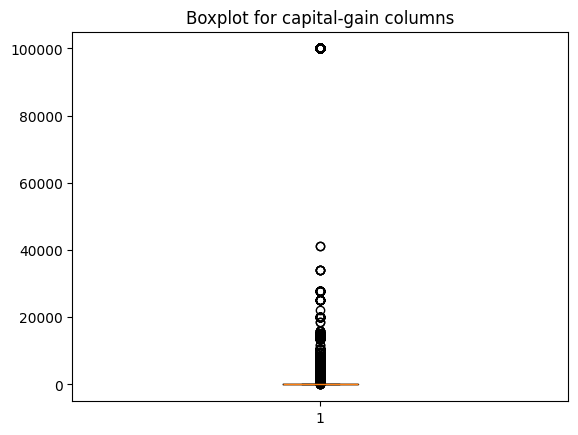

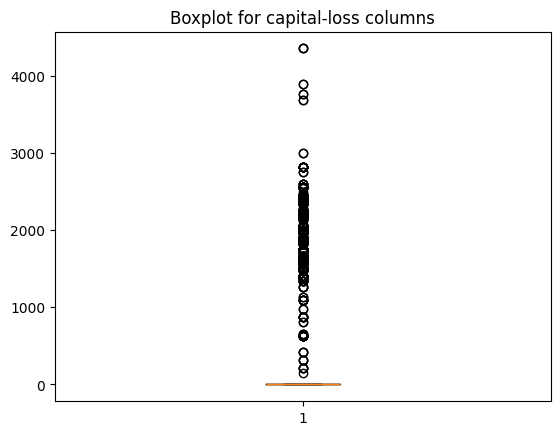

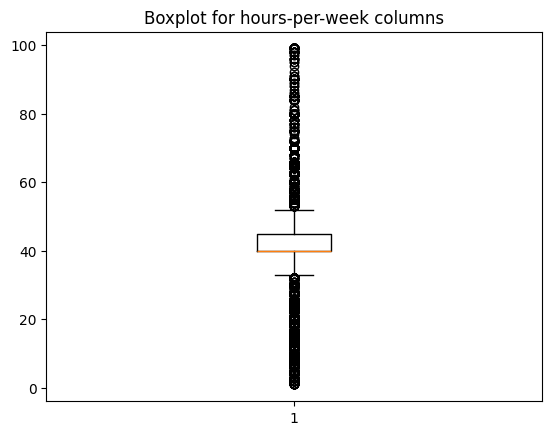

In [14]:
for x in df.columns:
  if df[x].dtype != "object":
    plt.boxplot(df[x])
    plt.title(f"Boxplot for {x} columns")
    plt.show()

In [15]:
out_list = []
for x in df.columns:
  if ((df[x].dtype != "object") & (x != "capital-loss") & (x != "capital-gain")):
    out_list.append(x)

In [16]:
out_list

['age', 'fnlwgt', 'education-num', 'hours-per-week']

**How do we eliminate them**

In [17]:
for x in out_list:
  # Finding the 25% and 75%
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  # Find the IQR
  IQR = Q3 - Q1

  # We need to find out the UL and LL
  UL = Q3 + 1.5 * IQR

  LL = Q1 - 1.5 * IQR

  # We need to put the data into the given limits of LL and UL
  df = df[(df[x] >= LL) & (df[x]<=UL)]

<hr>

**Encoding for the data**

In [18]:
# Initialize the object of LabelEncoder
encoder = LabelEncoder()

In [19]:
# We are implementing the encoding on the object columns
for x in df.columns:
  if df[x].dtype == "object":
    df[x] = encoder.fit_transform(df[x])

<hr>

# **Step 4 - Feature Selection**

**Correlation of data with the target column**

<Axes: >

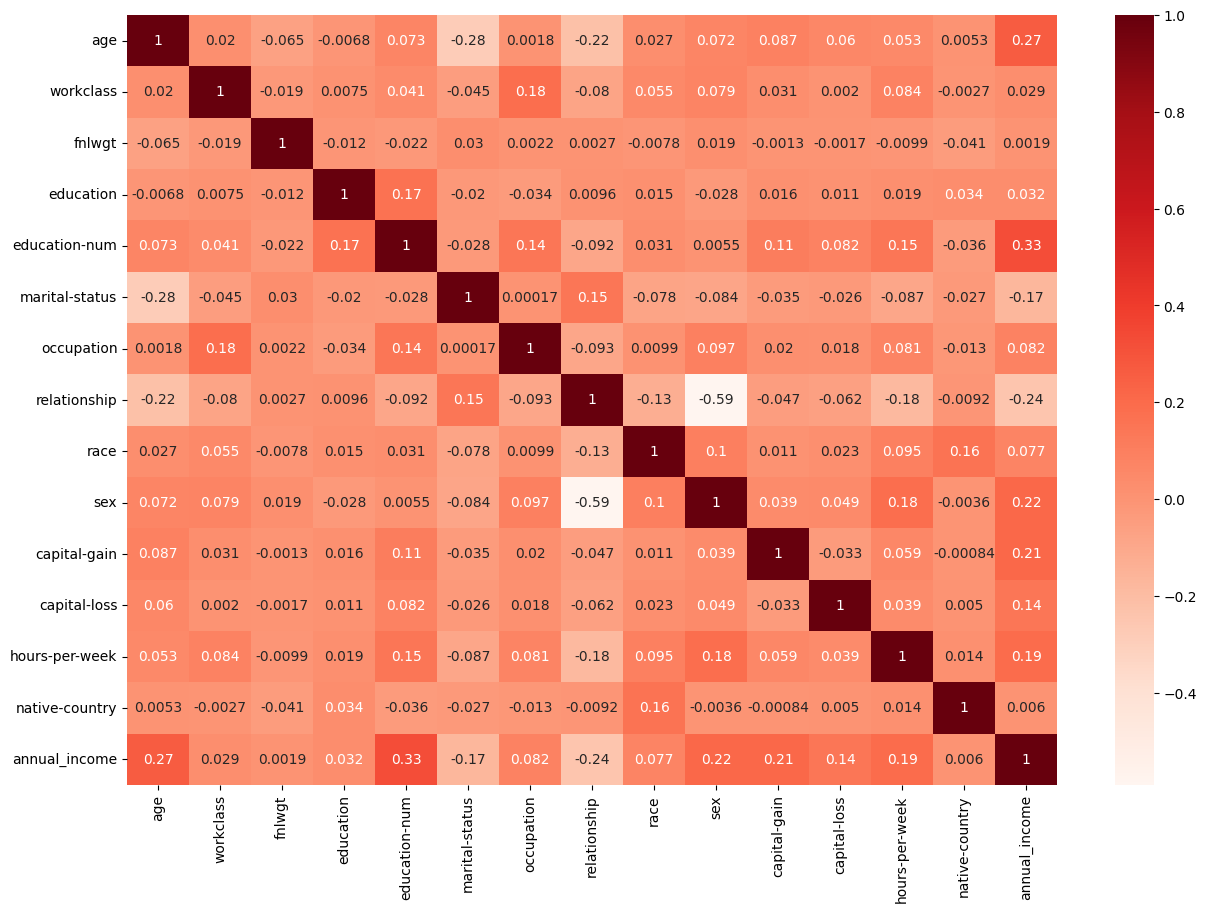

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")

In [21]:
df["annual_income"].value_counts(normalize = True)

annual_income
0    0.736341
1    0.263659
Name: proportion, dtype: float64

**For now, we are taking all the columns in consideration**

<hr>

# **Step 5 - Model Building Phase**

**Feature Division**

In [22]:
# Independent Features
x = df.drop("annual_income", axis = 1)
# Dependent Features
y = df["annual_income"]

**Data Division**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 25)

**Model Building**
- LogisticRegression
- DecisionTree Classifier
- RandomForest Classifier

**We are creating model structure**

In [24]:
models = {
    "Logistic Regression Model" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

In [39]:
models.items()

dict_items([('Logistic Regression Model', LogisticRegression()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('Random Forest Classifier', RandomForestClassifier())])

**Fitting the data into each of them**

In [26]:
for name, model in models.items():
  print(f"Name of the Model: {name}")
  # Fit the data
  model.fit(x_train, y_train)

  # Predictions
  pred = model.predict(x_test)

  # Validate the performance
  print(f"Accuracy Score: {accuracy_score(y_test, pred)}")
  print("==================================================")
  print(classification_report(y_test, pred))
  print("==================================================")

Name of the Model: Logistic Regression Model
Accuracy Score: 0.7823947512301804
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4065
           1       0.70      0.28      0.40      1422

    accuracy                           0.78      5487
   macro avg       0.75      0.62      0.63      5487
weighted avg       0.77      0.78      0.75      5487

Name of the Model: Decision Tree Classifier
Accuracy Score: 0.7856752323674139
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4065
           1       0.58      0.62      0.60      1422

    accuracy                           0.79      5487
   macro avg       0.72      0.73      0.73      5487
weighted avg       0.79      0.79      0.79      5487

Name of the Model: Random Forest Classifier
Accuracy Score: 0.8372516858028066
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4065

<hr>

**What could be done to deal with the imbalancement**

In [27]:
# Library needed
from imblearn.over_sampling import ADASYN

In [28]:
# Create a object to ADASYN
ada = ADASYN(random_state = 43)

In [29]:
# Resample the data
x_B, y_B = ada.fit_resample(x, y)

In [30]:
# Redistribute the data into train and test
x_train_B, x_test_B, y_train_B, y_test_B = train_test_split(x_B, y_B, test_size = 0.25, random_state = 43)

**Building the model**

In [31]:
models = {
    "Logistic Regression Model" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

**Fitting the data**

In [32]:
for name, model in models.items():
  print(f"Name of the Model: {name}")
  # Fit the data
  model.fit(x_train_B, y_train_B)

  # Predictions
  pred = model.predict(x_test_B)

  # Validate the performance
  print(f"Accuracy Score: {accuracy_score(y_test_B, pred)}")
  print("==================================================")
  print(classification_report(y_test_B, pred))
  print("==================================================")

Name of the Model: Logistic Regression Model
Accuracy Score: 0.6897892624184646
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      4034
           1       0.69      0.67      0.68      3938

    accuracy                           0.69      7972
   macro avg       0.69      0.69      0.69      7972
weighted avg       0.69      0.69      0.69      7972

Name of the Model: Decision Tree Classifier
Accuracy Score: 0.8371801304565981
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4034
           1       0.84      0.83      0.83      3938

    accuracy                           0.84      7972
   macro avg       0.84      0.84      0.84      7972
weighted avg       0.84      0.84      0.84      7972

Name of the Model: Random Forest Classifier
Accuracy Score: 0.8763171098845961
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4034

<hr>

# **Step 6 - Hyper-parameter**

**Can we improvise the accuracy a bit more**

<hr>

**Describe the grid parameters**

In [81]:
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [5, 10, 20, 30, 40],
    "min_samples_split" : [2, 5, 10, 30, 60,100],
    "min_samples_leaf" : [1, 2, 3, 4, 10, 20] 
}

**Model that we need to work**

In [82]:
dt = DecisionTreeClassifier()

**We need to perform the Hyperparameter tuning**

In [83]:
# Here we have defined the tuning
grid_search_dt = GridSearchCV(dt, parameters, cv=4, verbose=3)

# Fit the data into tuning
grid_search_dt.fit(x_train_B, y_train_B)

# This variable will store the model with best parameters
bestModel = grid_search_dt.best_estimator_

# Get the best parameters
best_params_dt = grid_search_dt.best_params_


Fitting 4 folds for each of 360 candidates, totalling 1440 fits
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.820 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.809 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.823 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.819 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.820 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.809 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.823 total time=   0.0s
[CV 1/4] END cri

[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.819 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.820 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.809 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5;, score=0.823 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.819 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.820 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.809 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.823 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_sp

[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5;, score=0.838 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5;, score=0.838 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5;, score=0.841 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.837 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.838 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10;, score=0.842 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_sa

[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.837 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.837 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.839 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.837 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.837 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.839 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=4, min_s

[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.832 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.824 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.836 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.831 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=1, min_sa

[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2;, score=0.839 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5;, score=0.828 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5;, score=0.833 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5;, score=0.837 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=5;, score=0.838 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10;, score=0.830 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10;, score=0.834 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=10;, score=0.837 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=4, min_sa

[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2;, score=0.816 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5;, score=0.821 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5;, score=0.822 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10;, score=0.826 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10;, score=0.826 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_sam

[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.830 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.831 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.830 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.828 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.832 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=10;, score=0.827 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=4, min_samp

[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=20, min_samples_split=100;, score=0.847 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2;, score=0.828 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=5;, score=0.821 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=5;, score=0.831 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=5;, score=0.820 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_sa

[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=100;, score=0.850 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2;, score=0.828 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=5;, score=0.828 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=5;, score=0.831 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=4, min_sam

[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.847 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.846 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.847 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.806 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.810 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.815 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.806 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=5, min_samp

[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=60;, score=0.815 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=100;, score=0.806 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=100;, score=0.812 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=100;, score=0.810 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=100;, score=0.815 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2;, score=0.806 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2;, score=0.810 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, mi

[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=60;, score=0.810 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=60;, score=0.815 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=100;, score=0.804 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=100;, score=0.812 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=100;, score=0.810 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=100;, score=0.815 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.828 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.842 total time=   0.0s
[CV 3/4] END criterion=entropy, max_de

[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=60;, score=0.827 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=60;, score=0.842 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=60;, score=0.834 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=60;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=100;, score=0.827 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=100;, score=0.843 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=100;, score=0.835 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=100;, score=0.835 total time=   0.0s
[CV 1/4] END criterion=entropy, max_

[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60;, score=0.825 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60;, score=0.840 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=60;, score=0.829 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=100;, score=0.824 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=100;, score=0.842 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=100;, score=0.832 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=100;, score=0.832 total time=   0.0s
[CV 1/4] END criterion=entro

[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=30;, score=0.845 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=60;, score=0.839 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=60;, score=0.847 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=60;, score=0.842 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=60;, score=0.841 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=100;, score=0.839 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=100;, score=0.851 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=100;, score=0.845 total time=   0.0s
[CV 4/4] END criterion=entropy, max_d

[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=30;, score=0.835 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=30;, score=0.841 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=30;, score=0.829 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=30;, score=0.842 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60;, score=0.835 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60;, score=0.840 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60;, score=0.836 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=20, min_samples_split=60;, score=0.843 total time=   0.0s
[CV 1/4] END criterion=entropy, 

[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=10;, score=0.831 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=30;, score=0.839 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=30;, score=0.843 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=30;, score=0.830 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=30;, score=0.847 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=60;, score=0.837 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=60;, score=0.846 total time=   0.0s
[CV 3/4] END criterion=entropy, max_dept

[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=5;, score=0.844 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=10;, score=0.834 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=10;, score=0.841 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=10;, score=0.832 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=10;, score=0.844 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=30;, score=0.834 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=30;, score=0.843 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=30;, score=0.833 total time=   0.0s
[CV 4/4] END criterion=entropy, m

[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=5;, score=0.827 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=5;, score=0.829 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=5;, score=0.823 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=10;, score=0.831 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=10;, score=0.831 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=10;, score=0.832 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=10;, score=0.836 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=40

[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=2;, score=0.841 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=2;, score=0.834 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=2;, score=0.844 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=5;, score=0.841 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=5;, score=0.834 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=5;, score=0.844 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=10;, score=0.834 total time=   0.0s
[CV 2/4] END criterion=entropy, max_dep

In [84]:
bestModel #20,2,100

DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=100)

In [85]:
x_test_B

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13534,41,4,152529,6,13,4,10,1,4,1,0,0,40,39
12337,45,4,129387,4,12,0,13,4,4,0,0,0,40,0
30432,47,2,307748,7,13,3,11,1,2,0,0,0,42,20
4401,25,4,240676,11,10,0,13,3,4,0,0,0,40,39
4140,44,4,79531,8,9,2,3,0,4,1,0,0,45,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15950,32,4,110279,4,12,0,10,4,2,0,0,0,35,39
18084,47,4,97176,11,10,0,4,4,4,0,0,0,40,39
11022,46,4,190115,11,10,2,12,0,4,1,0,1887,40,39
18492,31,4,227886,11,10,4,1,4,2,0,0,0,35,39


In [86]:
# Trying to do some predictions
pred_B = bestModel.predict(x_test_B)

In [88]:
# Validate the performance
print(f"Accuracy Score: {accuracy_score(y_test_B, pred_B)}")
print("==================================================")
print(classification_report(y_test_B, pred_B))

Accuracy Score: 0.8538635223281485
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4034
           1       0.86      0.85      0.85      3938

    accuracy                           0.85      7972
   macro avg       0.85      0.85      0.85      7972
weighted avg       0.85      0.85      0.85      7972



**Before Hyper Parameter Tuning** 

Decision Tree Classifier   

Accuracy Score: 0.8371801304565981

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4034
           1       0.84      0.83      0.83      3938


**After Hyper Parameter Tuning**  

Accuracy Score: 0.8538635223281485

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4034
           1       0.86      0.85      0.85      3938
    